In [1]:
###### import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = np.load('Data/bay/pems-bay.npy').T
print(data.shape)
data1 = data[:,:2016]

(319, 2880)


/tmp/ipykernel_1325/4166907038.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])


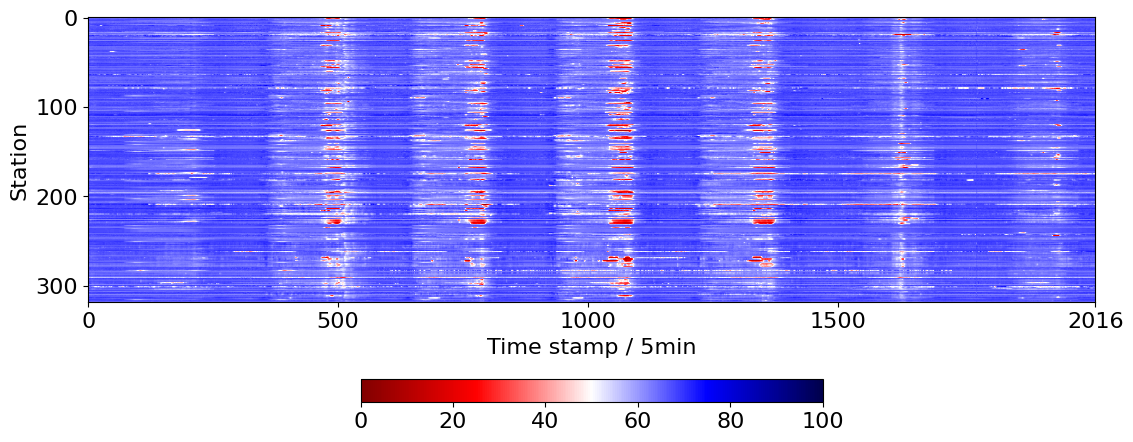

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 设置全局字体属性
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

# 假设data是你的二维数组数据
# data = np.random.rand(101, 2500) * 100  # 示例数据

# 创建图像和轴对象
fig, ax = plt.subplots(figsize=(13, 5))  # 调整图像大小

# 显示图像
cax = ax.imshow(data1, cmap='seismic_r', aspect='auto', vmin=0, vmax=100)

# 设置y轴标签
ax.set_yticks([0, 100,200,300])
ax.set_yticklabels(['0', '100','200','300'])
ax.set_ylabel('Station')
# 设置x轴标签
ax.set_xticks([0, 500, 1000, 1500, 2016])
ax.set_xticklabels(['0', '500', '1000', '1500', '2016'])
ax.set_xlabel('Time stamp / 5min')

# 创建colorbar并调整其位置和大小
cbar = fig.colorbar(cax, orientation='horizontal', fraction=0.06, pad=0.2)
cbar.ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])


# 调整colorbar的刻度方向
cbar.ax.yaxis.set_tick_params(direction='in')

# 显示图像
plt.show()

/tmp/ipykernel_1325/1450235121.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])


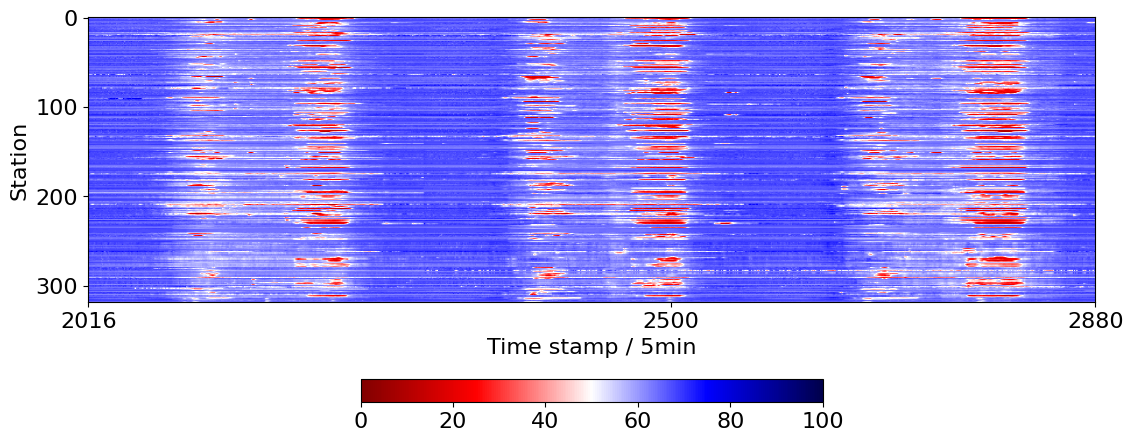

In [3]:
data2 = data[:,2016:]
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 设置全局字体属性
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

# 假设data是你的二维数组数据
# data = np.random.rand(101, 2500) * 100  # 示例数据

# 创建图像和轴对象
fig, ax = plt.subplots(figsize=(13, 5))  # 调整图像大小

# 显示图像
cax = ax.imshow(data2, cmap='seismic_r', aspect='auto', vmin=0, vmax=100)

# 设置y轴标签
ax.set_yticks([0, 100,200,300])
ax.set_yticklabels(['0', '100','200','300'])
ax.set_ylabel('Station')
# 设置x轴标签
ax.set_xticks([0, 500, 864])
ax.set_xticklabels(['2016', '2500', '2880'])
ax.set_xlabel('Time stamp / 5min')

# 创建colorbar并调整其位置和大小
cbar = fig.colorbar(cax, orientation='horizontal', fraction=0.06, pad=0.2)
cbar.ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])


# 调整colorbar的刻度方向
cbar.ax.yaxis.set_tick_params(direction='in')

# 显示图像
plt.show()

In [4]:
df = pd.read_csv('Data/bay/graph_sensor_locations_bay.csv')
df

,sensor_id,latitude,longitude
0,400001,37.364085,-121.901149
1,400017,37.253303,-121.945440
2,400030,37.359087,-121.906538
3,400040,37.294949,-121.873109
4,400045,37.363402,-121.902233
...,...,...,...
320,413845,37.422887,-121.925747
321,413877,37.321613,-121.899642
322,413878,37.324641,-121.888603
323,414284,37.323066,-121.896538


In [5]:
# 创建地图对象，设置初始位置和缩放级别
import folium

m = folium.Map(location=[df.iloc[0]['latitude'], df.iloc[0]['longitude']], zoom_start=13)

# 添加传感器位置为点，并设置阴影效果
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # 点的大小
        color='black',  # 点的边框颜色
        fill=True,  # 是否填充
        fill_color='black',  # 填充颜色
        fill_opacity=0.7,  # 填充透明度，增加阴影效果
        weight=2  # 边框宽度，增加阴影效果
    ).add_to(m)

# 展示地图
m